In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [9]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [11]:
x_train[0].shape

(28, 28)

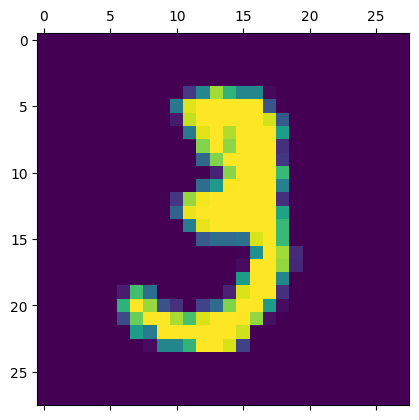

In [12]:
plt.matshow(x_train[10])

In [13]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train_flatten=x_train.reshape(len(x_train),28*28)

In [17]:
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [18]:
model.evaluate(x_test_flatten,y_test)

NameError: name 'model' is not defined

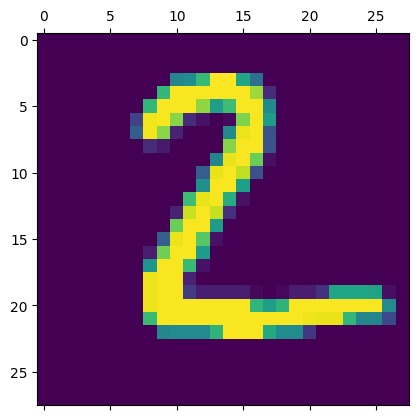

In [19]:
plt.matshow(x_test[1])

In [62]:
y_predicted=model.predict(x_test)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([6.6847242e-03, 9.7854984e-01, 9.9999875e-01, 8.5246748e-01,
       3.4931109e-09, 8.1373423e-02, 6.2235212e-03, 1.0174015e-05,
       8.7937218e-01, 8.6001435e-08], dtype=float32)

In [63]:
np.argmax(y_predicted[1])

np.int64(2)

In [51]:
model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.0113696e-03, 2.5616058e-03, 4.7303551e-01, ..., 9.9999845e-01,
        2.4467610e-02, 4.1199780e-01],
       [1.6583517e-02, 9.6759403e-01, 9.9999720e-01, ..., 7.7709421e-09,
        2.5968245e-01, 9.3013632e-09],
       [2.2909902e-03, 9.9827015e-01, 3.2872692e-01, ..., 8.2406588e-02,
        2.8306854e-01, 6.4967680e-03],
       ...,
       [1.8825577e-07, 1.2707118e-05, 6.5575171e-07, ..., 6.7239833e-01,
        4.4339114e-01, 7.2842586e-01],
       [7.0671062e-04, 7.3394808e-04, 4.9155196e-06, ..., 3.1807387e-04,
        9.8729932e-01, 2.4547013e-05],
       [9.8681018e-02, 3.5470057e-06, 4.3314499e-01, ..., 5.7740071e-06,
        5.1791598e-05, 1.2181554e-06]], dtype=float32)

In [64]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [65]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    0,    1,    4,    2,    1,    4,    2],
       [   0, 1120,    3,    2,    0,    1,    3,    0,    6,    0],
       [   4,    0, 1008,    1,    1,    1,    2,    9,    6,    0],
       [   0,    0,    8,  987,    1,    2,    0,    6,    5,    1],
       [   1,    0,    3,    1,  967,    0,    3,    3,    2,    2],
       [   2,    0,    0,    9,    2,  864,    6,    0,    7,    2],
       [   5,    3,    3,    1,    7,    3,  932,    0,    4,    0],
       [   1,    5,    9,    5,    5,    0,    0,  997,    0,    6],
       [   2,    0,    3,    8,    5,    2,    0,    6,  945,    3],
       [   3,    2,    0,    7,   25,    3,    0,    5,    4,  960]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

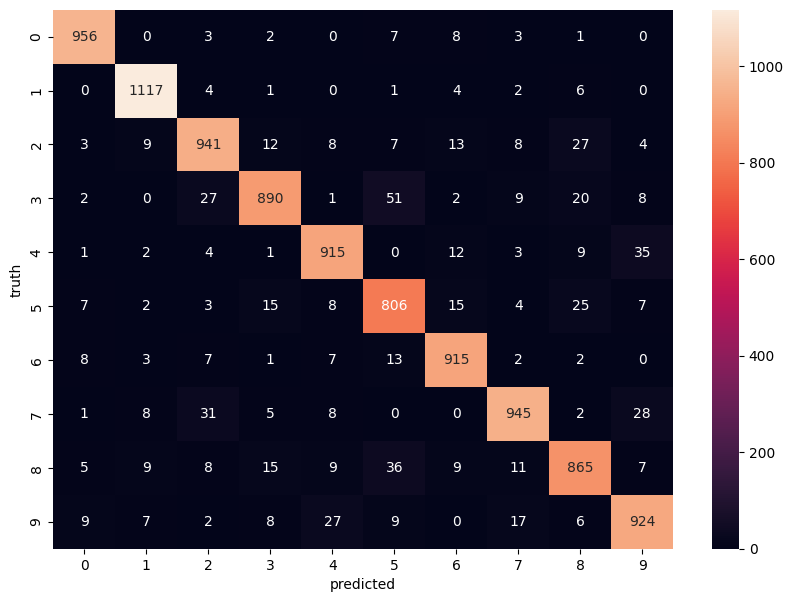

In [54]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [20]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train_flatten,y_train,epochs=5)

C:\Users\kanak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8691 - loss: 0.4590
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9612 - loss: 0.1368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9739 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9802 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9859 - loss: 0.0498


In [21]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0963


[0.08027296513319016, 0.9761000275611877]

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

NameError: name 'cm' is not defined

<Figure size 1000x700 with 0 Axes>

In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=5)

C:\Users\kanak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\kanak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8687 - loss: 0.4670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.9598 - loss: 0.1361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9747 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9815 - loss: 0.0621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9841 - loss: 0.0532


In [24]:
y_predicted=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [25]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9733 - loss: 0.0893


[0.07756976038217545, 0.9769999980926514]

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    1,    0,    3,    1,    3,    1],
       [   0, 1127,    1,    1,    0,    2,    2,    1,    1,    0],
       [   4,    4,  999,    4,    2,    0,    4,    5,   10,    0],
       [   0,    0,    2,  991,    0,    9,    0,    1,    4,    3],
       [   1,    0,    1,    1,  967,    0,    3,    0,    1,    8],
       [   2,    0,    0,    8,    2,  872,    3,    1,    2,    2],
       [   3,    1,    0,    1,    5,    9,  936,    0,    3,    0],
       [   1,    4,    5,    7,    3,    0,    0,  992,    2,   14],
       [   4,    0,    2,    7,    6,    8,    2,    1,  934,   10],
       [   2,    2,    0,    6,    8,    2,    1,    2,    3,  983]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

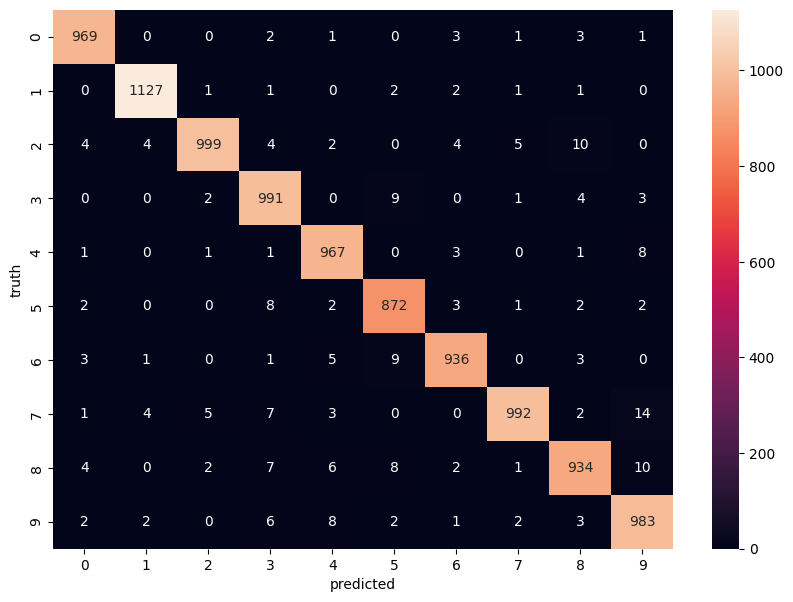

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [29]:
model.save('digit_model.keras')
